In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
# import packages
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# read data
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.shape

(8693, 14)

## Explore the dataset

In [5]:
# check missing values
miss_vals = df.isna().sum()
miss_vals

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

All columns have missing values except `PassengerId` and `Transported`.

In [6]:
df = df.dropna(axis=0)
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [7]:
df.shape

(6606, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


In [9]:
df.PassengerId.nunique()

6606

All Id's are unique.

In [10]:
print(df.HomePlanet.nunique())
print(df.HomePlanet.unique())

3
['Europa' 'Earth' 'Mars']


In [11]:
df.HomePlanet.value_counts()

Earth     3566
Europa    1673
Mars      1367
Name: HomePlanet, dtype: int64

In [12]:
def val_percent(col):
    print(df[col].value_counts()*100 / df.shape[0])

val_percent('HomePlanet')

Earth     53.981229
Europa    25.325462
Mars      20.693309
Name: HomePlanet, dtype: float64


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

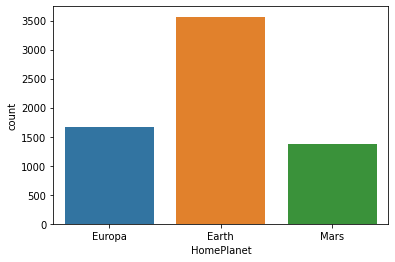

In [13]:
sns.countplot(data=df, x='HomePlanet')

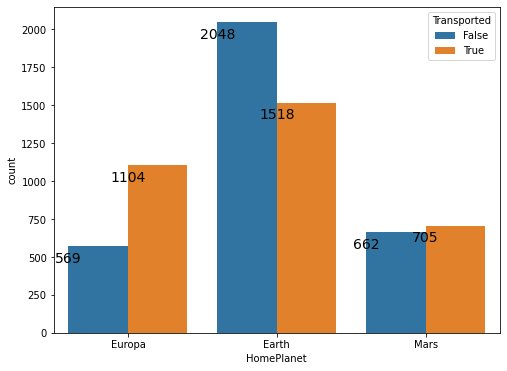

In [14]:
def annotate_bar(col):
    plt.figure(figsize=(8, 6))
    splot = sns.countplot(data=df, x=col, hue='Transported')
    for p in splot.patches:
        splot.annotate(format(round(p.get_height()), '.0f'),
                      (p.get_x() + p.get_y() / 2., p.get_height()),
                      ha='center', va='center', size=14, xytext=(0,-12),
                      textcoords='offset points')
        
annotate_bar('HomePlanet')

Most passengers were from `Earth`, more than double than that of second most planet `Europa`.

In [15]:
df.CryoSleep.unique()

array([False, True], dtype=object)

In [16]:
df.CryoSleep.value_counts()

False    4274
True     2332
Name: CryoSleep, dtype: int64

In [17]:
val_percent('CryoSleep')

False    64.698759
True     35.301241
Name: CryoSleep, dtype: float64


<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

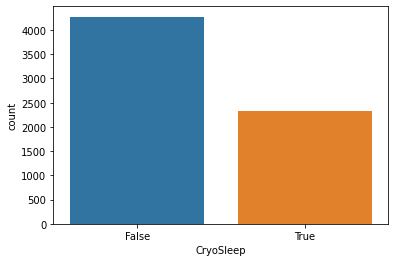

In [18]:
sns.countplot(data=df, x='CryoSleep')

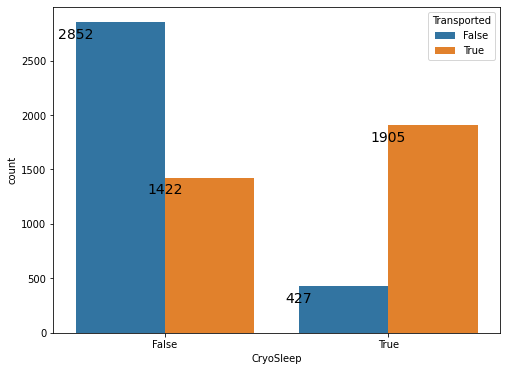

In [19]:
annotate_bar('CryoSleep')

If the passenger was in cryo sleep, he was more likely to be transported, than the passenger who was not in cryosleep

In [20]:
# cabin
df['Cabin'].nunique()

5305

In [21]:
df['cabin_deck'] = df['Cabin'].apply(lambda x: x.split('/')[0])
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F


In [22]:
df['cabin_num'] = df['Cabin'].apply(lambda x: x.split('/')[1])
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1


In [23]:
df['cabin_side'] = df['Cabin'].apply(lambda x: x.split('/')[2])
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [24]:
df['Destination'].nunique()

3

In [25]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

<AxesSubplot:xlabel='Destination', ylabel='count'>

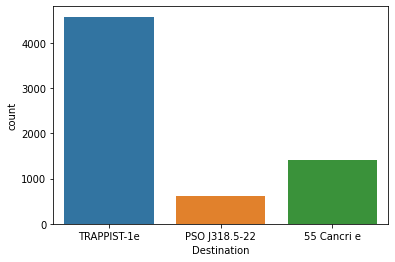

In [26]:
sns.countplot(data=df, x='Destination')

Most passengers were en route to `TRAPPIST-le`

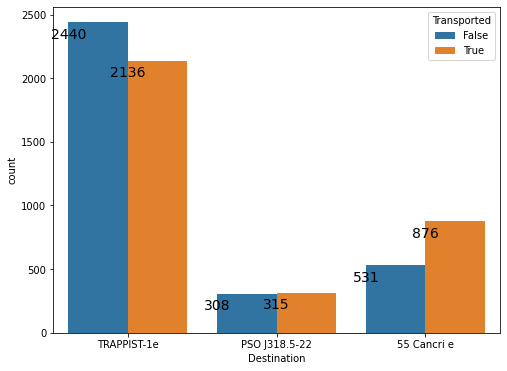

In [27]:
annotate_bar('Destination')

Not much of effect on Trasportation status.

<AxesSubplot:xlabel='Age', ylabel='Density'>

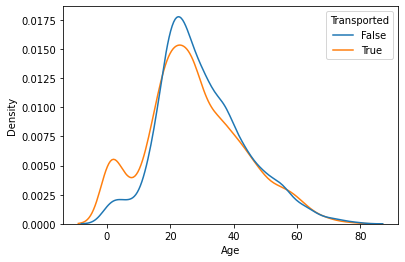

In [28]:
sns.kdeplot(data=df, x="Age", hue='Transported')

Most passengers were around 25 years of age. Not much effect on Trasportation status.

<AxesSubplot:xlabel='VIP', ylabel='count'>

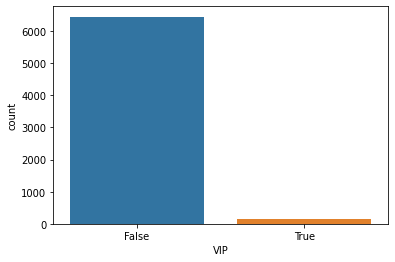

In [29]:
# VIP
sns.countplot(data=df, x='VIP')

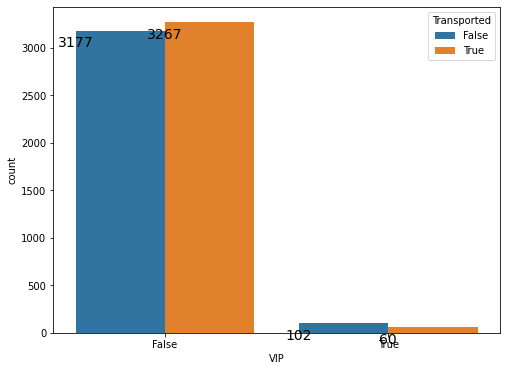

In [30]:
annotate_bar('VIP')

Not much of effect on Trasportation status.

<AxesSubplot:ylabel='Density'>

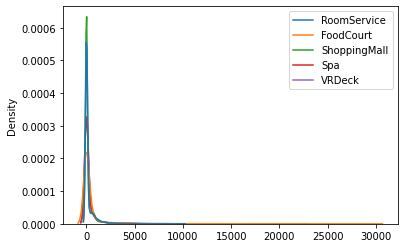

In [31]:
sns.kdeplot(data=df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

<AxesSubplot:xlabel='RoomService', ylabel='Density'>

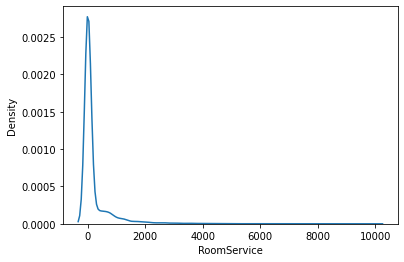

In [32]:
sns.kdeplot(data=df, x='RoomService')

In [33]:
df['RoomService'].describe()

count    6606.000000
mean      222.991674
std       644.987936
min         0.000000
25%         0.000000
50%         0.000000
75%        49.000000
max      9920.000000
Name: RoomService, dtype: float64

<AxesSubplot:xlabel='RoomService'>

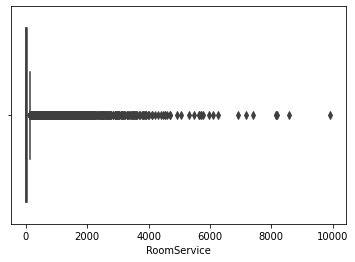

In [34]:
sns.boxplot(x=df['RoomService'])

Too much skqewness in all these variables